In [1]:
from npl.core import Nanoparticle
from npl.descriptors.local_environment_feature_classifier import LocalEnvironmentFeatureClassifier
from npl.calculators import BayesianRRCalculator
from npl.descriptors.global_feature_classifier import testTopologicalFeatureClassifier
from npl.utils.utils import plot_cummulative_success_rate
from ase.visualize import view

In [2]:
"""Create one randomly ordered start particle"""

def create_start_particle(height, trunc, stoichiometry):
    start_particle = Nanoparticle()
    start_particle.truncated_octahedron(height, trunc, stoichiometry)
    return start_particle

In [3]:
from npl.calculators.energy_calculator import compute_coefficients_for_linear_topological_model
from npl.calculators import BayesianRRCalculator

global_energy_calculator = BayesianRRCalculator.load('bayesian_rr_calculator.pkl')
global_topological_coefficients = global_energy_calculator.get_coefficients()
print(global_topological_coefficients)
symbols = ['Au', 'Pt']
n_atoms = 79
coefficients, total_energies = compute_coefficients_for_linear_topological_model(
    global_topological_coefficients,
    symbols, n_atoms)

energy_calculator = BayesianRRCalculator('TEC')
energy_calculator.set_coefficients(coefficients)

[0.03016271 0.32329118 0.41083637 0.43127808 0.         0.
 0.         0.         0.         0.         1.0948751  0.91791772
 0.         1.12424946 0.         0.         1.17573852]
Coef symbol_a: Au


In [4]:
from npl.descriptors.local_environment_feature_classifier import TopologicalEnvironmentClassifier
from npl.descriptors.local_environment_calculator import NeighborCountingEnvironmentCalculator


local_feature_classifier = TopologicalEnvironmentClassifier(NeighborCountingEnvironmentCalculator(symbols), symbols)

In [19]:
from npl.monte_carlo import run_monte_carlo as rmc

steps_MC, energies_MC = [], []
for i in range(10):
    start_particle = create_start_particle(4, 1, {'Au': 0.67, 'Pt': 0.33})
    beta, max_steps = 50, 5000
    [best_particle, accepted_energies] = rmc(beta, max_steps, start_particle, energy_calculator, local_feature_classifier)
    
    min_energy, min_step = min(accepted_energies, key=lambda x: x[0])
    energies_MC.append(min_energy)
    steps_MC.append(min_step)

Step: 2000
Lowest energy: 30.146068627329587
Step: 4000
Lowest energy: 30.146068627329587
Step: 6000
Lowest energy: 30.146068627329587
Step: 2000
Lowest energy: 30.166913841020467
Step: 4000
Lowest energy: 30.13115023461285
Step: 6000
Lowest energy: 30.13115023461285
Step: 2000
Lowest energy: 30.15199544830373
Step: 4000
Lowest energy: 30.13115023461285
Step: 6000
Lowest energy: 30.13115023461285
Step: 2000
Lowest energy: 30.14606862732959
Step: 4000
Lowest energy: 30.14606862732959
Step: 2000
Lowest energy: 30.146068627329583
Step: 4000
Lowest energy: 30.146068627329583
Step: 2000
Lowest energy: 30.13115023461285
Step: 4000
Lowest energy: 30.13115023461285
Step: 6000
Lowest energy: 30.13115023461285
Step: 2000
Lowest energy: 30.131150234612853
Step: 4000
Lowest energy: 30.13115023461285
Step: 6000
Lowest energy: 30.13115023461285
Step: 8000
Lowest energy: 30.13115023461285
Step: 2000
Lowest energy: 30.146068627329583
Step: 4000
Lowest energy: 30.131150234612853
Step: 6000
Lowest energ

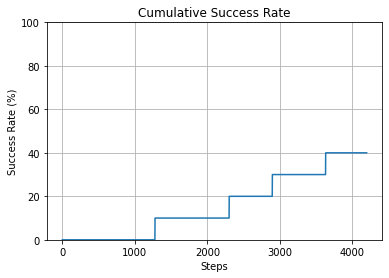

In [20]:
plot_cummulative_success_rate(energies_MC, steps_MC)

(0.0, 11.826796507002294, 0.0, 11.046)

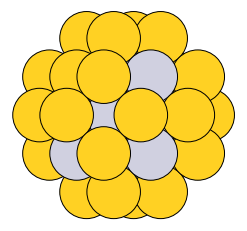

In [23]:
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt

plot_atoms(best_particle.get_ase_atoms(), rotation=('0x,-15y,0z'))
plt.axis('off')

In [15]:
view(best_particle.get_ase_atoms(), viewer='x3d')

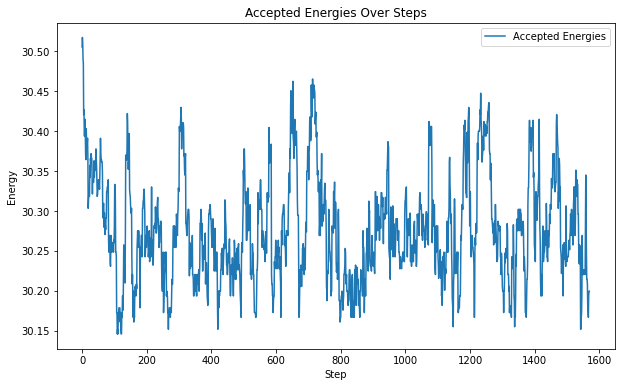

In [25]:
import matplotlib.pyplot as plt

# Extract energies from the accepted_energies list
energies = [energy for energy, _ in accepted_energies]

# Plot the energies
plt.figure(figsize=(10, 6))
plt.plot(energies, label='Accepted Energies')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Accepted Energies Over Steps')
plt.legend()
plt.show()

In [27]:
from npl.optimization.basin_hopping import run_basin_hopping

steps_BH, energies_BH = [], []
for i in range(20):
    start_particle = create_start_particle(4, 1, {'Au': 0.67, 'Pt': 0.33})
    [best_particle, lowest_energies, flip_energy_list] = run_basin_hopping(start_particle,
                                                                        energy_calculator, 
                                                                        total_energies, 
                                                                        100, 
                                                                        5,
                                                                        local_feature_classifier=None)
    energies_BH.append(lowest_energies[-2][0])
    steps_BH.append(lowest_energies[-2][1])

Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Lowest energy: 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Lowest energy: 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Lowest energy: 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Energy after local_opt: 30.131, lowest 30.131
Lowest energy:

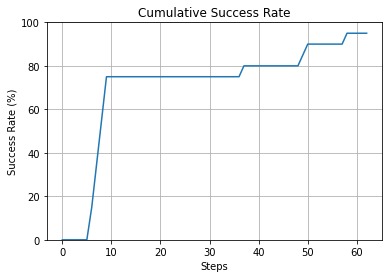

In [28]:
#plot_cummulative_success_rate(energies_MC, steps_MC,)
plot_cummulative_success_rate(energies_BH, steps_BH,)